In [ ]:
!git clone https://github.com/SoosanEXE/FYP.git

fatal: destination path 'FYP' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from FYP.Report import constants as reportpaths
from FYP.DataPreprocess import constants as preconst

In [ ]:
def col_countplot(col, train_data):
    fig, ax = plt.subplots(figsize=(12,9))
    sns.set_style('whitegrid')
    ax = sns.countplot(x=col, data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
def protoReport(proto, target_hue, df):
  plt.figure(figsize = (20,7))
  if target_hue == preconst.UNSW_TARGET:
    p = ['tcp', 'udp', 'arp']
    sns.countplot(data=df, y=df.proto.isin(p) ,hue = target_hue, palette="viridis")
  sns.countplot(data=df, y=df[proto] ,hue = target_hue, palette="viridis")
  plt.show()

In [ ]:
dfnsl = pd.read_csv(reportpaths.NSL_CSV)
dfunsw = pd.read_csv(reportpaths.UNSW_CSV)

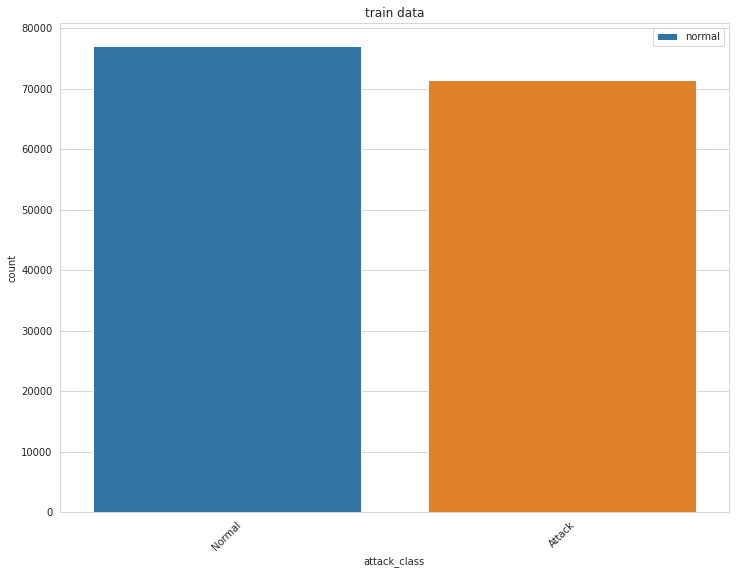

In [ ]:
col_countplot('attack_class', dfnsl)

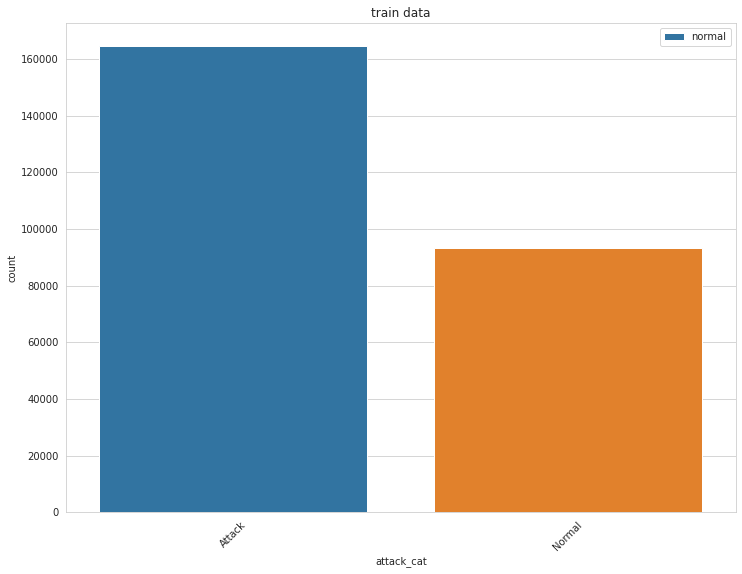

In [ ]:
col_countplot(preconst.UNSW_TARGET, dfunsw)

In [ ]:
def attackpie(df, target):
  temp = df[target].value_counts()
  a = temp.index
  b = temp.values
  zipped = list(zip(a, b))
  d = pd.DataFrame(zipped, columns=['class', 'occurances'])
  plt.figure(figsize=(9,7)) 
  plt.pie(data=d, x=b)
  labels = ['Normal','Attack']
  plt.legend(labels, bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()


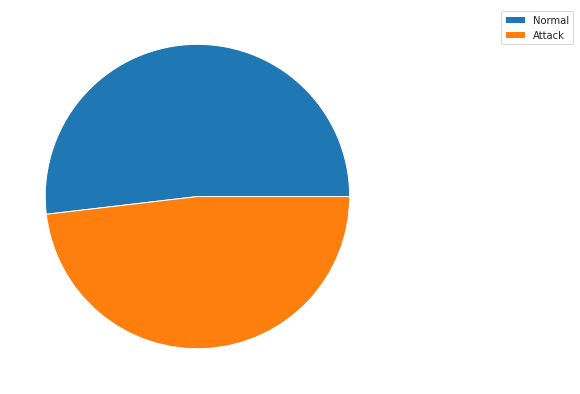

<Figure size 1080x1080 with 0 Axes>

In [112]:
attackpie(dfnsl, preconst.NSL_TARGET)

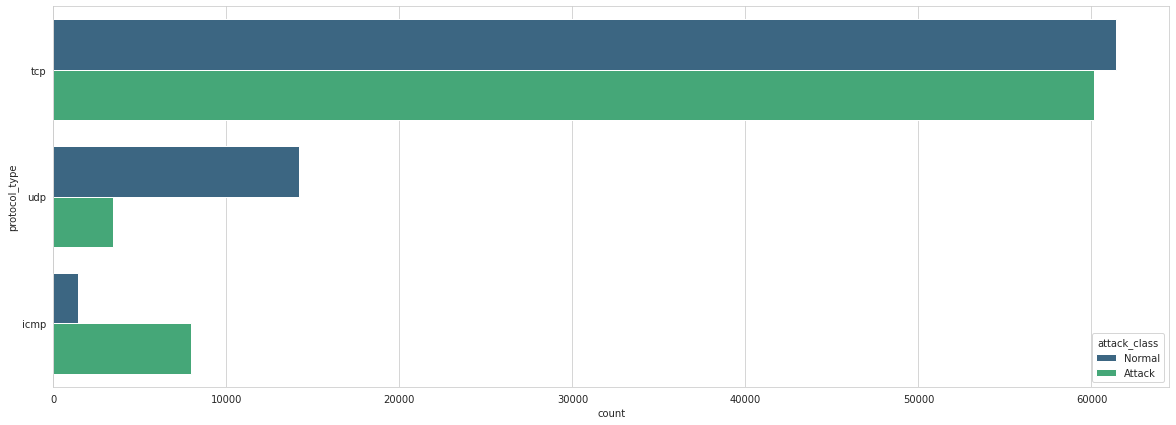

In [ ]:
protoReport('protocol_type', preconst.NSL_TARGET, dfnsl)

In [ ]:
# visualize numeric data
def create_plot_pivot(df, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = df.groupby([x_column, 'attack_class']).size() \
    .reset_index().pivot(columns='attack_class', index=x_column, values=0)
    return _df_plot

def print_num_plots(df, cols, n):
  fig, ax = plt.subplots(4, 3, figsize=(15,15))
  axe = ax.ravel()
  for i in range(n):
      create_plot_pivot(df, cols[i]).plot(kind='hist',stacked=True, ax=axe[i])
      axe[i].set_xlabel(cols[i])
  fig.show()

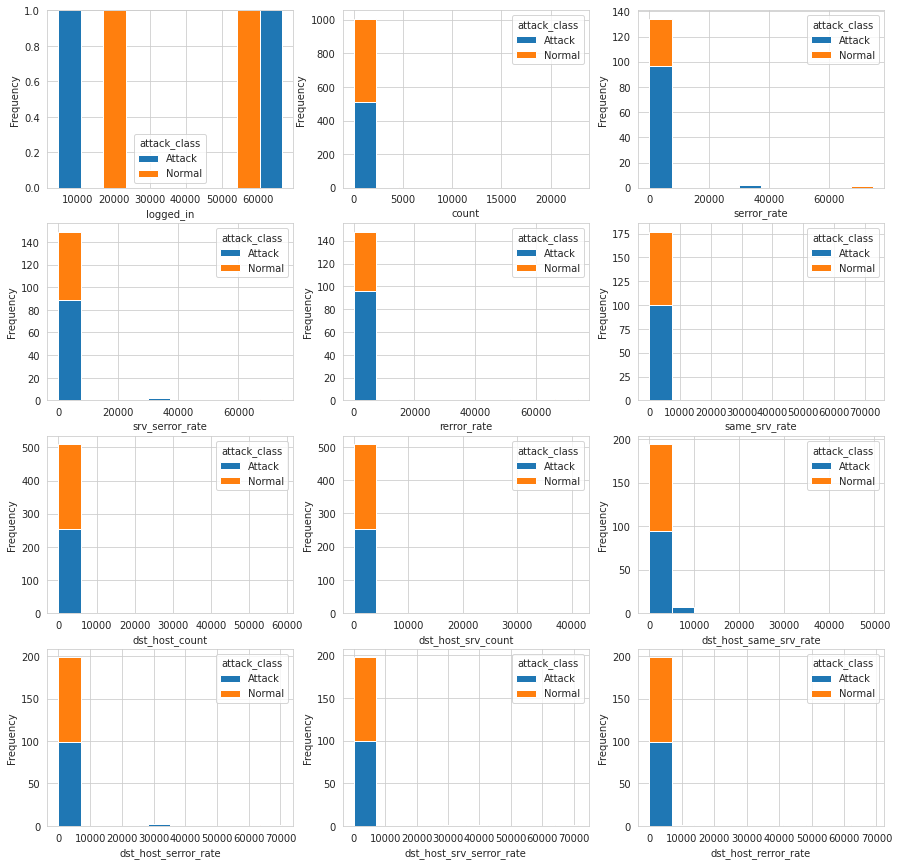

In [ ]:
colsnsl = ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate']
print_num_plots(dfnsl, colsnsl, len(colsnsl))